# Exploratory Data Analysis

### Data Pre-Processing/ Data Cleaning

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("yt_1.csv")
df2 = pd.read_csv("yt_2.csv")
df3 = pd.read_csv("yt_3.csv")
df4 = pd.read_csv("yt_4.csv")

df = pd.concat([df1, df2, df3, df4])

print("Combined dataset:")
print(df.head())

Combined dataset:
  YouTube_channel_name Influencer_insta_username    Content_category  \
0    Desiree Patterson                 csaunders        Spirituality   
1      Michelle Thomas                   daycody         Real Estate   
2          Nicole Koch               tracyhansen  Business & Careers   
3      Mercedes Flores               judithlopez        Spirituality   
4      Melissa Johnson              brownrichard              Beauty   

       Audience_country Influencer_location Audience_age_range  \
0  United Arab Emirates              Sweden              57-64   
1                 Egypt             Ireland              38-80   
2                Norway            Thailand              60-62   
3                 China         Philippines              56-84   
4                 Chile             Ireland              43-52   

   Engagement_rate Majority_audience_gender  Cost_per_post  \
0              5.3                   Female         500000   
1              5.4          

In [3]:
print(df.describe())

       Engagement_rate  Cost_per_post  Avg_likes_partnership_posts  \
count    495475.000000  495475.000000                495475.000000   
mean          2.963226  342497.885867                  4685.048727   
std           1.350594  161105.737401                  4223.829600   
min           0.500000   10000.000000                   500.000000   
25%           1.900000  200000.000000                  2339.000000   
50%           2.700000  500000.000000                  3871.000000   
75%           4.000000  500000.000000                  6081.000000   
max           6.500000  500000.000000                 49997.000000   

       YouTube_subscribers  YouTube_views  YouTube_video_count  
count        495475.000000   4.954750e+05        495475.000000  
mean         500769.470478   2.616091e+05           202.378699  
std          288508.789716   7.720187e+05           118.667559  
min            1002.000000   2.001000e+03            10.000000  
25%          250827.000000   2.672000e+04   

In [4]:
print(df.dtypes)

YouTube_channel_name            object
Influencer_insta_username       object
Content_category                object
Audience_country                object
Influencer_location             object
Audience_age_range              object
Engagement_rate                float64
Majority_audience_gender        object
Cost_per_post                    int64
Avg_likes_partnership_posts      int64
YouTube_subscribers              int64
YouTube_views                    int64
YouTube_video_count              int64
dtype: object


In [5]:
print(df.isnull().sum())

YouTube_channel_name              0
Influencer_insta_username         0
Content_category                  0
Audience_country                  0
Influencer_location            4865
Audience_age_range                0
Engagement_rate                   0
Majority_audience_gender          0
Cost_per_post                     0
Avg_likes_partnership_posts       0
YouTube_subscribers               0
YouTube_views                     0
YouTube_video_count               0
dtype: int64


In [6]:
df.dropna(subset=['Influencer_location'], inplace=True)
print(df.head())

  YouTube_channel_name Influencer_insta_username    Content_category  \
0    Desiree Patterson                 csaunders        Spirituality   
1      Michelle Thomas                   daycody         Real Estate   
2          Nicole Koch               tracyhansen  Business & Careers   
3      Mercedes Flores               judithlopez        Spirituality   
4      Melissa Johnson              brownrichard              Beauty   

       Audience_country Influencer_location Audience_age_range  \
0  United Arab Emirates              Sweden              57-64   
1                 Egypt             Ireland              38-80   
2                Norway            Thailand              60-62   
3                 China         Philippines              56-84   
4                 Chile             Ireland              43-52   

   Engagement_rate Majority_audience_gender  Cost_per_post  \
0              5.3                   Female         500000   
1              5.4                     Male   

In [7]:
print(df.isnull().sum())

YouTube_channel_name           0
Influencer_insta_username      0
Content_category               0
Audience_country               0
Influencer_location            0
Audience_age_range             0
Engagement_rate                0
Majority_audience_gender       0
Cost_per_post                  0
Avg_likes_partnership_posts    0
YouTube_subscribers            0
YouTube_views                  0
YouTube_video_count            0
dtype: int64


Grouping and Aggregation: Group data by categorical variables and calculate summary statistics within each group to gain insights into how different factors affect engagement rates, costs, etc.

In [8]:
content_category_stats = df.groupby('Content_category').agg({
    'Engagement_rate': ['mean', 'median'],
    'Cost_per_post': ['mean', 'median'],
    'Avg_likes_partnership_posts': ['mean', 'median'],
    'YouTube_subscribers': 'mean',
    'YouTube_views': 'mean',
    'YouTube_video_count': 'mean'
}).reset_index()

audience_country_stats = df.groupby('Audience_country').agg({
    'Engagement_rate': ['mean', 'median'],
    'Cost_per_post': ['mean', 'median'],
    'Avg_likes_partnership_posts': ['mean', 'median'],
    'YouTube_subscribers': 'mean',
    'YouTube_views': 'mean',
    'YouTube_video_count': 'mean'
}).reset_index()

audience_gender_stats = df.groupby('Majority_audience_gender').agg({
    'Engagement_rate': ['mean', 'median'],
    'Cost_per_post': ['mean', 'median'],
    'Avg_likes_partnership_posts': ['mean', 'median'],
    'YouTube_subscribers': 'mean',
    'YouTube_views': 'mean',
    'YouTube_video_count': 'mean'
}).reset_index()

print("Summary Statistics by Content Category:")
print(content_category_stats)

print("\nSummary Statistics by Audience Country:")
print(audience_country_stats)

print("\nSummary Statistics by Majority Audience Gender:")
print(audience_gender_stats)

Summary Statistics by Content Category:
           Content_category Engagement_rate         Cost_per_post            \
                                       mean median           mean    median   
0                   Animals        2.879062    2.6  344528.531218  500000.0   
1                       Art        2.946451    2.7  339996.062217  200000.0   
2                    Beauty        2.956845    2.7  342894.840295  500000.0   
3        Business & Careers        2.932923    2.7  341574.699791  200000.0   
4            Cinema/Theatre        2.951250    2.7  340227.137473  200000.0   
5                    Comedy        2.924364    2.7  341160.365703  200000.0   
6                     Dance        2.951124    2.7  344723.292213  500000.0   
7                 Education        2.933040    2.7  341495.799971  200000.0   
8                    Family        2.959453    2.7  342885.846108  500000.0   
9                   Fashion        2.955206    2.7  341677.822837  200000.0   
10          

Correlation Analysis: Examine correlations between different numerical variables using correlation matrices or scatter plots to identify any significant relationships

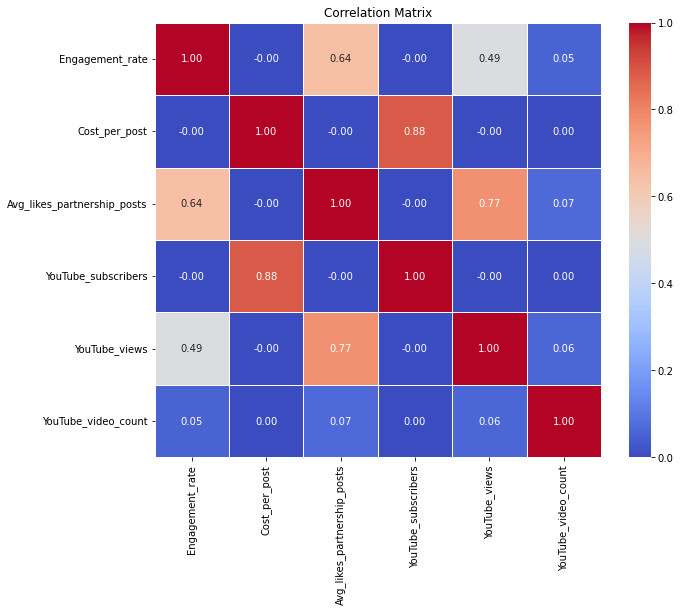

<Figure size 864x432 with 0 Axes>

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(12, 6))


plt.tight_layout()
plt.show()

Visualizations: Create visualizations (e.g., histograms, box plots, scatter plots) to explore relationships between variables, identify patterns, and detect outliers.

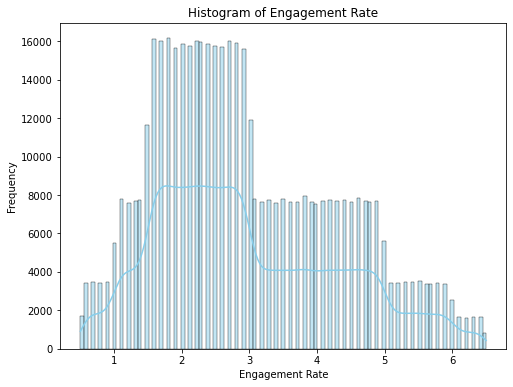

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

sns.histplot(df['Engagement_rate'], kde=True, color='skyblue')

plt.title('Histogram of Engagement Rate')
plt.xlabel('Engagement Rate')
plt.ylabel('Frequency')

plt.show()

In [11]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (490610, 13)


In [12]:
bins = [0, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000]

bin_labels = ['Under 1K', '1K to 5K', '5K to 10K', '10K to 50K', '50K to 100K', '100K to 500K', '500K to 1M', '1M to 5M', '5M to 10M']

df['YouTube_subscribers range'] = pd.cut(df['YouTube_subscribers'], bins=bins, labels=bin_labels, right=False)

print(df[['YouTube_subscribers', 'YouTube_subscribers range']])

       YouTube_subscribers YouTube_subscribers range
0                   640634                500K to 1M
1                    29342                10K to 50K
2                   244825              100K to 500K
3                   247856              100K to 500K
4                   790423                500K to 1M
...                    ...                       ...
98696               944563                500K to 1M
98697               824509                500K to 1M
98698               467703              100K to 500K
98699               845947                500K to 1M
98700               428838              100K to 500K

[490610 rows x 2 columns]


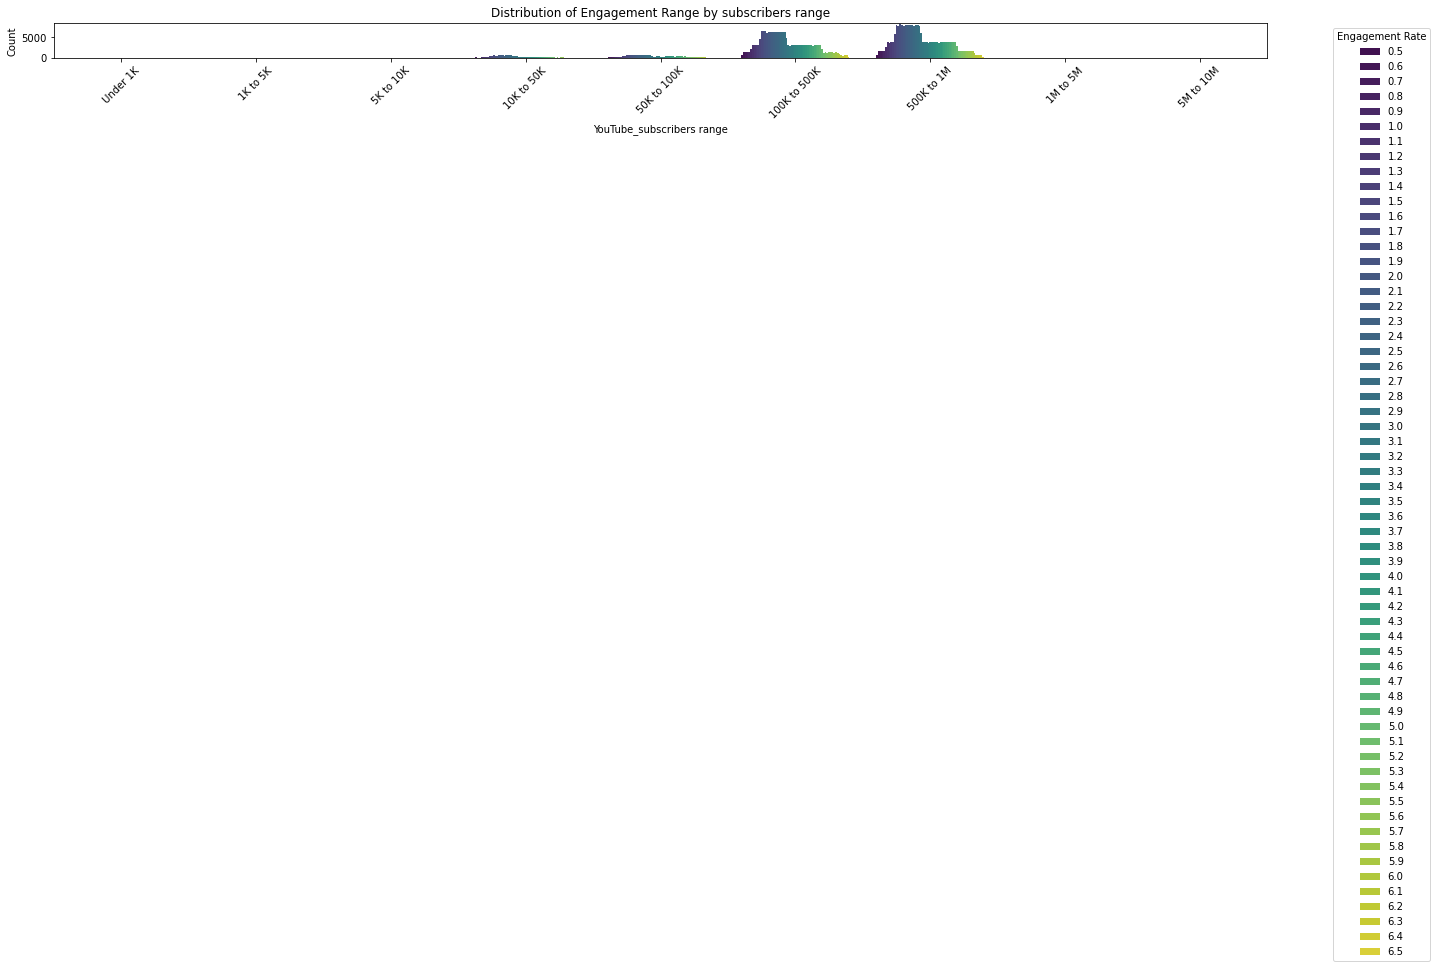

In [13]:
plt.figure(figsize=(20, 8))
sns.countplot(x='YouTube_subscribers range', data=df, hue='Engagement_rate', palette='viridis')
plt.title('Distribution of Engagement Range by subscribers range')
plt.xlabel('YouTube_subscribers range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Engagement Rate', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

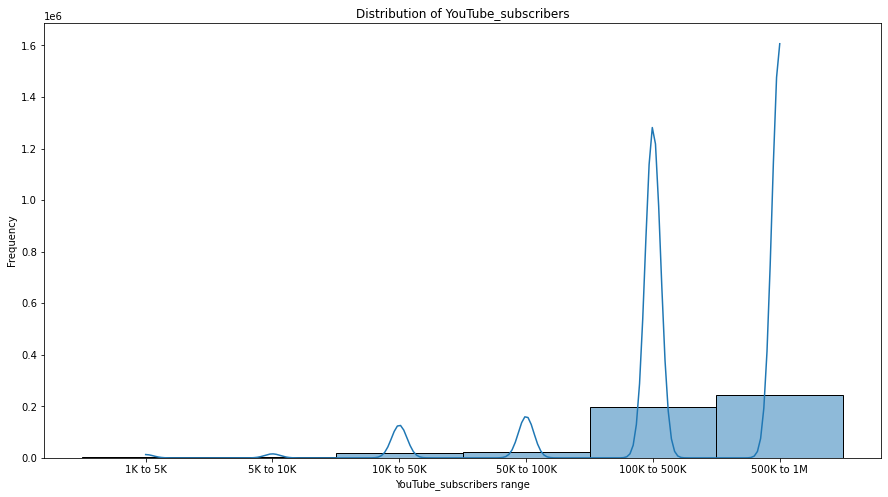

In [14]:
plt.figure(figsize=(15, 8))
sns.histplot(df['YouTube_subscribers range'], bins=20, kde=True)
plt.title('Distribution of YouTube_subscribers')
plt.xlabel('YouTube_subscribers range')
plt.ylabel('Frequency')
plt.show()

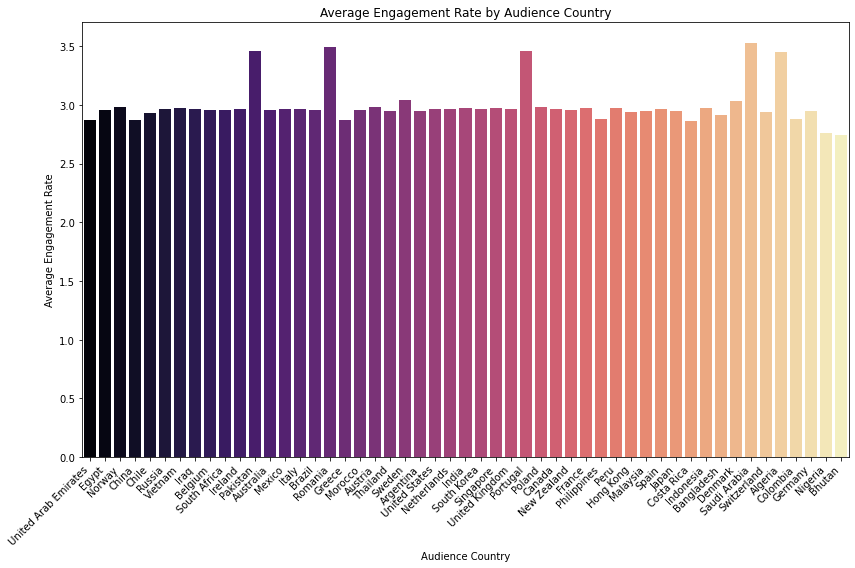

In [15]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Audience_country', y='Engagement_rate', data=df, ci=None, palette = 'magma')
plt.title('Average Engagement Rate by Audience Country')
plt.xlabel('Audience Country')
plt.ylabel('Average Engagement Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
column_name = 'Avg_likes_partnership_posts'

column_min = df[column_name].min()
column_max = df[column_name].max()

print("Minimum value of column '{}': {}".format(column_name, column_min))
print("Maximum value of column '{}': {}".format(column_name, column_max))

Minimum value of column 'Avg_likes_partnership_posts': 500
Maximum value of column 'Avg_likes_partnership_posts': 49997


In [17]:
bins = [0, 1000, 5000, 10000, 50000, 100000]

bin_labels = ['Under 1K', '1K to 5K', '5K to 10K', '10K to 50K', '50K to 100K']

df['Likes Range'] = pd.cut(df['Avg_likes_partnership_posts'], bins=bins, labels=bin_labels, right=False)

print(df[['Avg_likes_partnership_posts', 'Likes Range']])

       Avg_likes_partnership_posts Likes Range
0                             8973   5K to 10K
1                             8552   5K to 10K
2                             1377    1K to 5K
3                             5239   5K to 10K
4                             6779   5K to 10K
...                            ...         ...
98696                         4865    1K to 5K
98697                         1399    1K to 5K
98698                         9299   5K to 10K
98699                         9680   5K to 10K
98700                         5161   5K to 10K

[490610 rows x 2 columns]


Text(0, 0.5, 'Frequency')

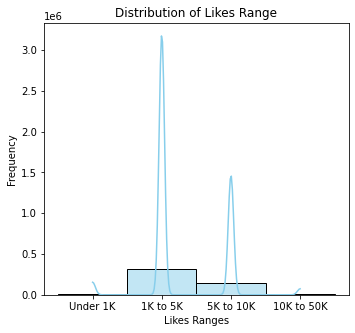

In [18]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Likes Range'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Likes Range')
plt.xlabel('Likes Ranges')
plt.ylabel('Frequency')

In [19]:
print(df['YouTube_views'])

0        609944
1        411029
2         36978
3        706106
4        228329
          ...  
98696     47430
98697     16589
98698    949331
98699    984939
98700    485217
Name: YouTube_views, Length: 490610, dtype: int64


In [20]:
column_name = 'YouTube_views'

column_min = df[column_name].min()
column_max = df[column_name].max()

print("Minimum value of column '{}': {}".format(column_name, column_min))
print("Maximum value of column '{}': {}".format(column_name, column_max))

Minimum value of column 'YouTube_views': 2001
Maximum value of column 'YouTube_views': 9995958


In [21]:
view_bins = [0, 1000, 5000, 10000, 50000, 100000, 1000000, 50000000]
view_bin_labels = ['Under 1K', '1K to 5K', '5K to 10K', '10K to 50K', '50K to 100K', '100K to 1M', '1M to 50M']

df['Views Range'] = pd.cut(df['YouTube_views'], bins=view_bins, labels=view_bin_labels, right=False)

print(df[['YouTube_views', 'Views Range']])

       YouTube_views Views Range
0             609944  100K to 1M
1             411029  100K to 1M
2              36978  10K to 50K
3             706106  100K to 1M
4             228329  100K to 1M
...              ...         ...
98696          47430  10K to 50K
98697          16589  10K to 50K
98698         949331  100K to 1M
98699         984939  100K to 1M
98700         485217  100K to 1M

[490610 rows x 2 columns]


In [22]:
print(df.isnull().sum())

YouTube_channel_name           0
Influencer_insta_username      0
Content_category               0
Audience_country               0
Influencer_location            0
Audience_age_range             0
Engagement_rate                0
Majority_audience_gender       0
Cost_per_post                  0
Avg_likes_partnership_posts    0
YouTube_subscribers            0
YouTube_views                  0
YouTube_video_count            0
YouTube_subscribers range      0
Likes Range                    0
Views Range                    0
dtype: int64


Text(0, 0.5, 'Frequency')

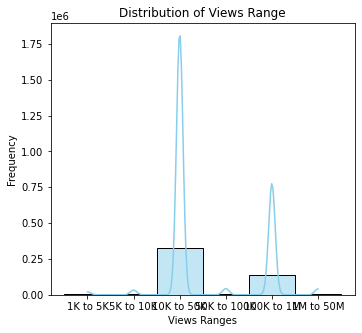

In [23]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Views Range'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Views Range')
plt.xlabel('Views Ranges')
plt.ylabel('Frequency')

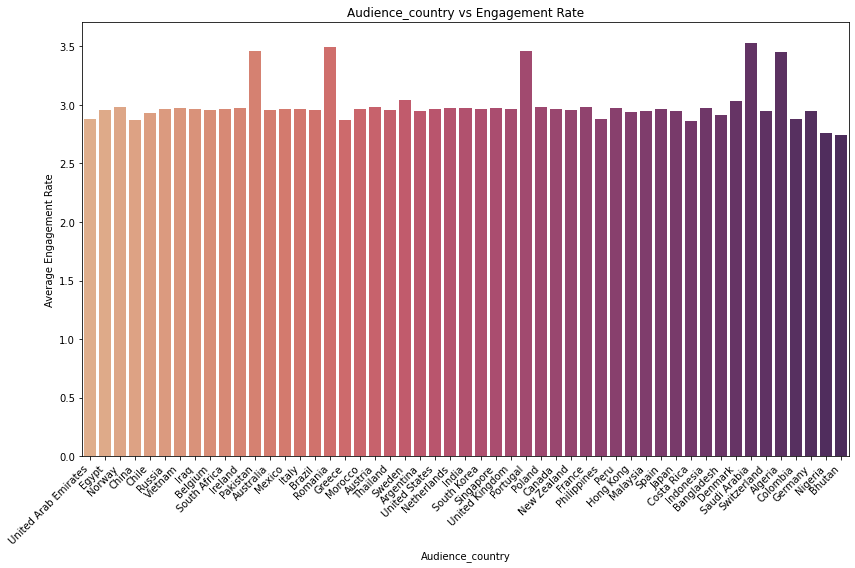

In [24]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Audience_country', y='Engagement_rate', data=df, ci=None, palette = "flare")
plt.title('Audience_country vs Engagement Rate')
plt.xlabel('Audience_country')
plt.ylabel('Average Engagement Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

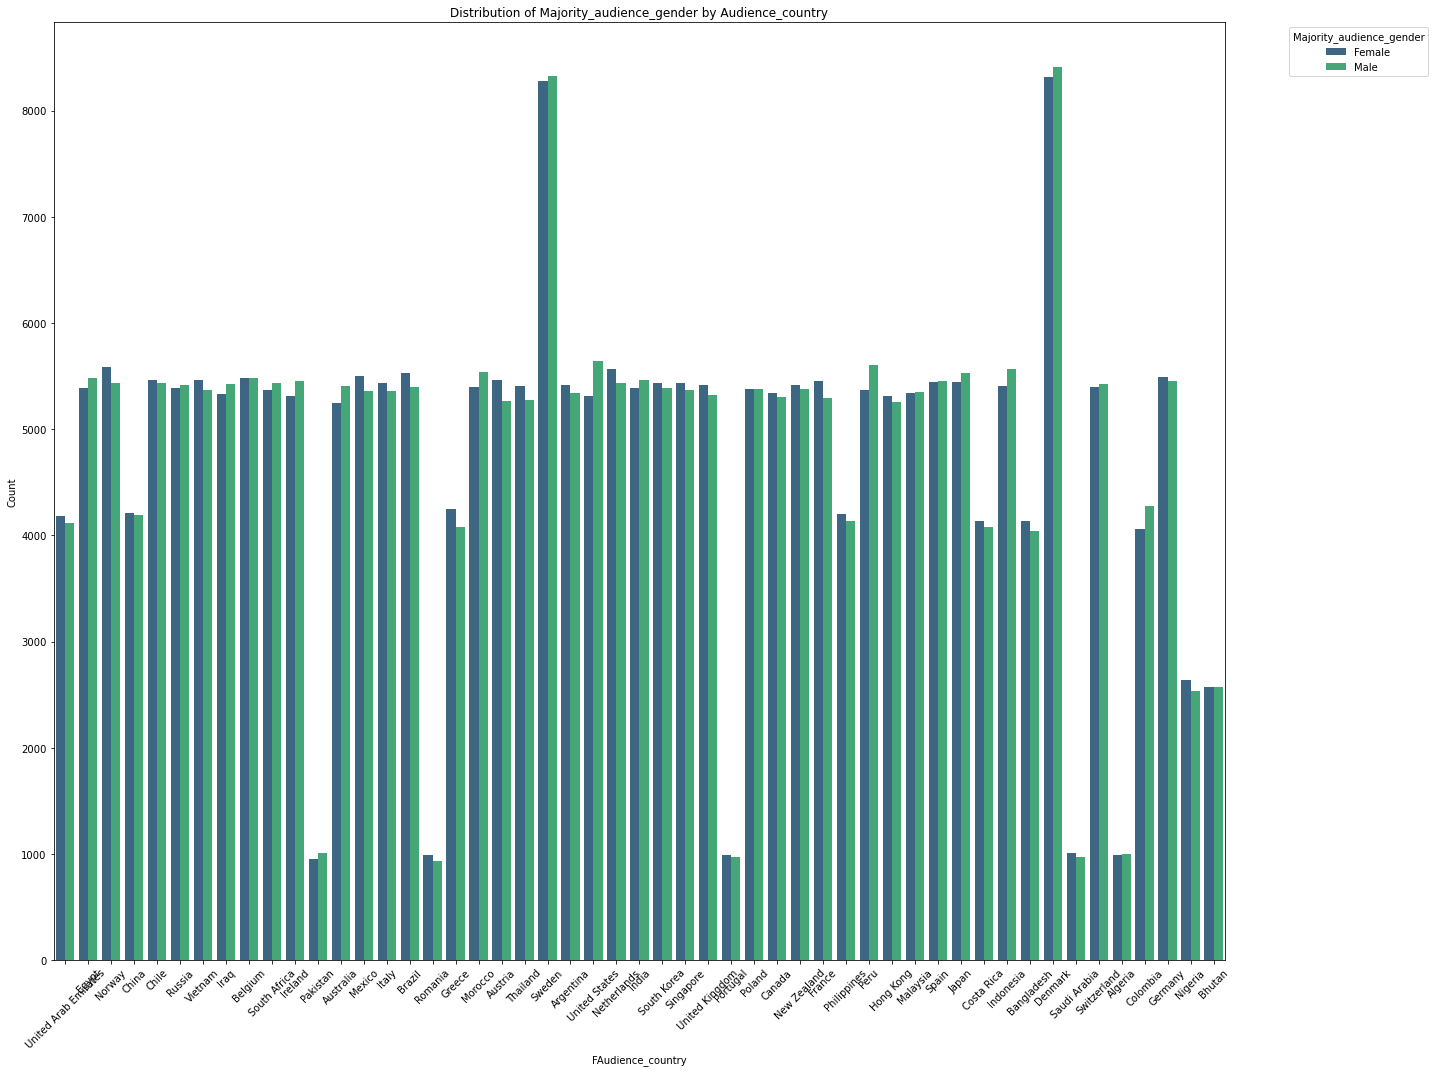

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
sns.countplot(x='Audience_country', data=df, hue='Majority_audience_gender', palette='viridis')
plt.title('Distribution of Majority_audience_gender by Audience_country')
plt.xlabel('FAudience_country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Majority_audience_gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

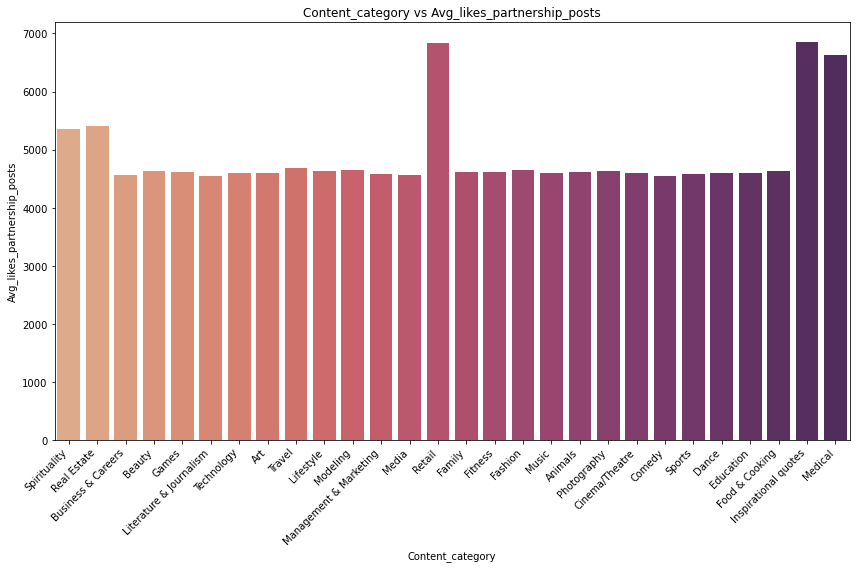

In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Content_category', y='Avg_likes_partnership_posts', data=df, ci=None, palette = "flare")
plt.title('Content_category vs Avg_likes_partnership_posts')
plt.xlabel('Content_category')
plt.ylabel('Avg_likes_partnership_posts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

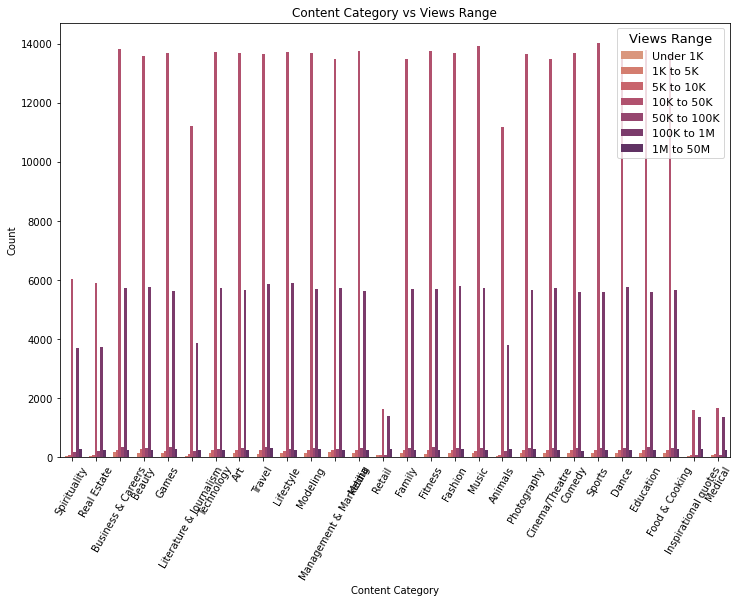

In [27]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Content_category', hue='Views Range', data=df, palette="flare")
plt.title('Content Category vs Views Range')
plt.xlabel('Content Category')
plt.ylabel('Count')
plt.xticks(rotation=60)  
plt.legend(title='Views Range', title_fontsize='13', fontsize='11', loc='upper right')
plt.show()

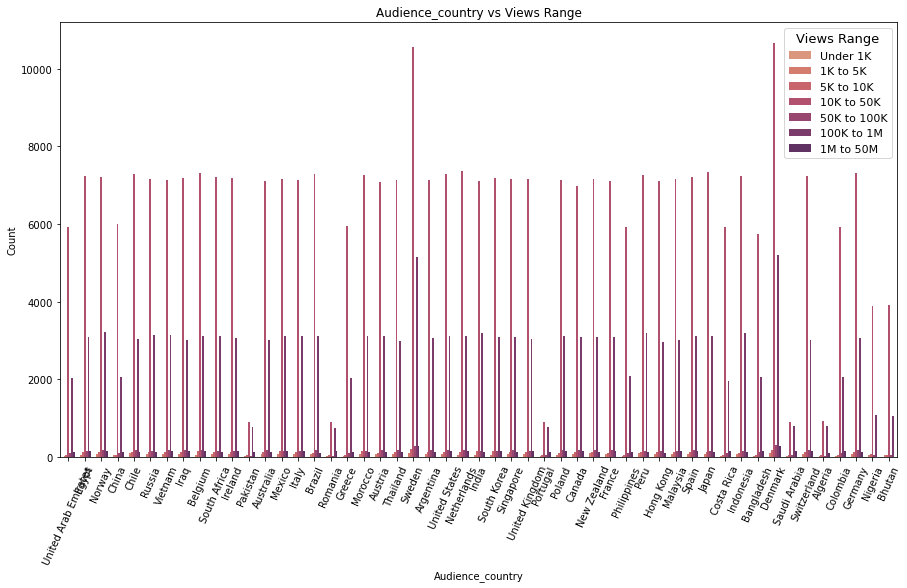

In [28]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Audience_country', hue='Views Range', data=df, palette="flare")
plt.title('Audience_country vs Views Range')
plt.xlabel('Audience_country')
plt.ylabel('Count')
plt.xticks(rotation=66) 
plt.legend(title='Views Range', title_fontsize='13', fontsize='11', loc='upper right')
plt.show()

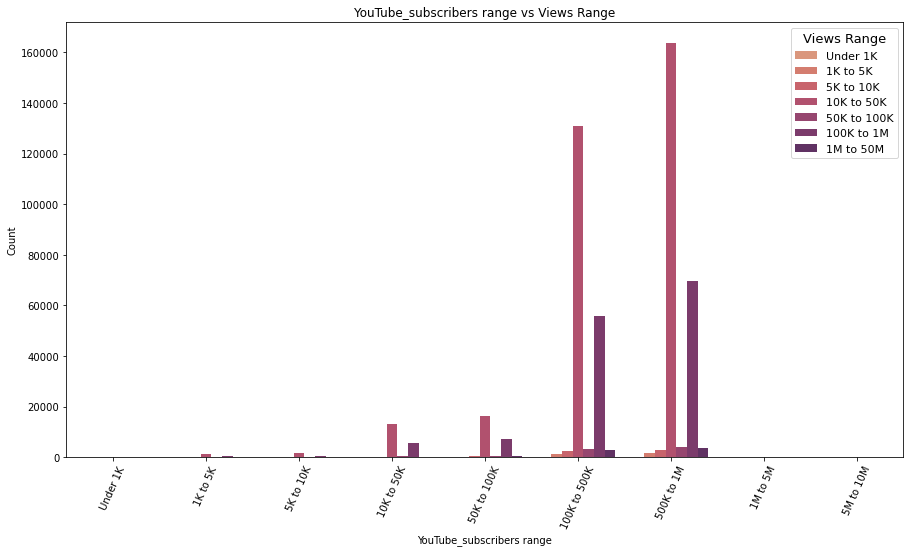

In [29]:
plt.figure(figsize=(15, 8))
sns.countplot(x='YouTube_subscribers range', hue='Views Range', data=df, palette="flare")
plt.title('YouTube_subscribers range vs Views Range')
plt.xlabel('YouTube_subscribers range')
plt.ylabel('Count')
plt.xticks(rotation=66)  
plt.legend(title='Views Range', title_fontsize='13', fontsize='11', loc='upper right')
plt.show()

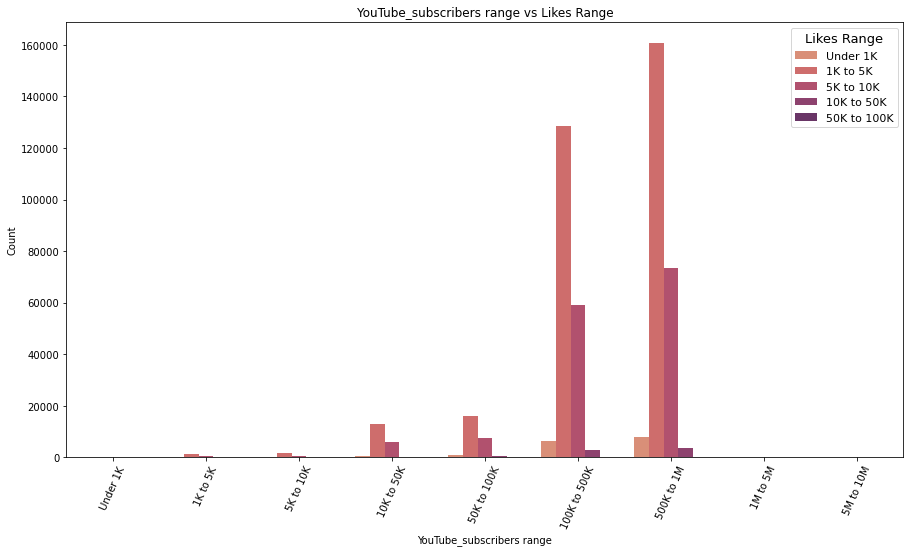

In [30]:
plt.figure(figsize=(15, 8))
sns.countplot(x='YouTube_subscribers range', hue='Likes Range', data=df, palette="flare")
plt.title('YouTube_subscribers range vs Likes Range')
plt.xlabel('YouTube_subscribers range')
plt.ylabel('Count')
plt.xticks(rotation=66)  
plt.legend(title='Likes Range', title_fontsize='13', fontsize='11', loc='upper right')
plt.show()